Importamos las librerias necesarias para poder trabajar con los datos entregados

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import csv

Brindamos el acceso a colab para que pueda acceder a google drive y con ello entrar al repositorio donde encontramos nuestra data

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


En caso se requiera de alguna alternativa para poder acceder a los datos podemos usar la libreria csv para leer ficheros de este tipo

In [ ]:
with open('/content/drive/MyDrive/EjercicioBipi/customers.csv') as datos:
    customer = csv.reader(datos, delimiter=',')
    for row in customer:
        print(row)

['CustomerID', 'Gender', 'Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Profession', 'Work Experience', 'Family Size']
['1', 'Male', '19', '15000', '39', 'Healthcare', '1', '4']
['2', 'Male', '21', '35000', '81', 'Engineer', '3', '3']
['3', 'Female', '20', '86000', '6', 'Engineer', '1', '1']
['4', 'Female', '23', '59000', '77', 'Lawyer', '0', '2']
['5', 'Female', '31', '38000', '40', 'Entertainment', '2', '6']
['6', 'Female', '22', '58000', '76', 'Artist', '0', '2']
['7', 'Female', '35', '31000', '6', 'Healthcare', '1', '3']
['8', 'Female', '23', '84000', '94', 'Healthcare', '1', '3']
['9', 'Male', '64', '97000', '3', 'Engineer', '0', '3']
['10', 'Female', '30', '98000', '72', 'Artist', '1', '4']
['11', 'Male', '67', '7000', '14', 'Engineer', '1', '3']
['12', 'Female', '35', '93000', '99', 'Healthcare', '4', '4']
['13', 'Female', '58', '80000', '15', 'Executive', '0', '5']
['14', 'Female', '24', '91000', '77', 'Lawyer', '1', '1']
['15', 'Male', '37', '19000', '13', 'Doctor', '0

Leemos el archivo .csv brindado para obtener los datos en una variable usando pandas

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/EjercicioBipi/customers.csv')

Los datos proporcionados los convertimos en un dataframe para el manejo eficiente de los datos

In [ ]:
df = pd.DataFrame(data)

Mostramos una muestra de los datos para conocer acerca de sus cabeceras y la información que estos almacenan

In [ ]:
df.head(5)

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


Para un manejo eficiente de los datos podemos visualizar el tipo de informacion que posee cada columna y aplicar asi las diversas funciones para limpieza de los mismps

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


Validaremos que no existan datos repetidos y todos sean unicos

In [ ]:
df.drop_duplicates()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2


Validamos que posee 2000 registros en el archivo proporcionado

In [ ]:
original_total=df["CustomerID"].count()

In [ ]:
original_total

2000

Validamos la calidad de los datos por cada columna para saber que tratamiento brindar a datos que posiblemente sean inconsistentes
Nota: Se esta colocando como comentario la funcion sum para validar que la cantidad de datos mostrada en las agrupaciones sea acorde a la original

In [ ]:
df.groupby(["Gender"])["CustomerID"].count()#.sum ()

Gender
Female    1186
Male       814
Name: CustomerID, dtype: int64

In [ ]:
df.groupby(["Age"])["CustomerID"].count()#.sum()

Age
0     24
1     26
2     15
3     18
4     15
      ..
95    21
96    22
97    22
98     9
99    17
Name: CustomerID, Length: 100, dtype: int64

In [ ]:
df.groupby(["Annual Income ($)"])["CustomerID"].count()#.sum()

Annual Income ($)
0         2
1000      1
2000      2
3000      4
4000      6
         ..
189672    1
189689    1
189709    1
189945    1
189974    1
Name: CustomerID, Length: 1786, dtype: int64

In [ ]:
df.groupby(["Spending Score (1-100)"])["CustomerID"].count()#.sum()

Spending Score (1-100)
0       2
1      18
2      14
3      21
4      24
       ..
96     26
97     20
98     15
99     20
100    18
Name: CustomerID, Length: 101, dtype: int64

In [ ]:
df.groupby(["Profession"])["CustomerID"].count()#.sum()

Profession
Artist           612
Doctor           161
Engineer         179
Entertainment    234
Executive        153
Healthcare       339
Homemaker         60
Lawyer           142
Marketing         85
Name: CustomerID, dtype: int64

In [ ]:
df.groupby(["Work Experience"])["CustomerID"].count()#.sum()

Work Experience
0     431
1     470
2      63
3      55
4     121
5     117
6     120
7     126
8     166
9     160
10     84
11     14
12     17
13     16
14     16
15     14
16      5
17      5
Name: CustomerID, dtype: int64

In [ ]:
df.groupby(["Family Size"])["CustomerID"].count()#.sum()

Family Size
1    299
2    361
3    311
4    289
5    258
6    243
7    234
8      4
9      1
Name: CustomerID, dtype: int64

En base a las agrupaciones realizadas se nota los siguientes puntos:


1.   La columna "Gender" garantiza la consistencia de los datos
2.   La columna "Age" posee algunas inconsistencias ya que los datos obtenidos pertenecen a personas profesionales pero se pueden apreciar edad que son menores a 18 años por lo cual se necesita realizar algun tipo de ajuste
3.   La columna "Annual Income ($)" posee algunos valores de 0 pero podemos asumir que momentaneamente dichas personas estan desempleadas por lo cual no generan ingresos, tomando como referencia que "Annual Income" es el ingreso por año por ejercer su carrera profesional
4.   La columna "Spending Score (1-100)" posee valores de 0 cuando en el rango mostrado se visualiza que los valores solo van del 1 al 100 lo cual necesita realizar algun tipo de ajuste
5.   La columna "Profession" no muestra errores a simple vista pero si quitamos la sección comentada de la suma visualizaremos que las cantidades sumadas por cada tipo es de 1965 por lo que posiblemente hallan valores no reportados al ser nulos y deba realizarse un ajuste
6.   La columna "Work Experience" debemos analizarla a más profundidad tomando como base que los números proporcionados son expresado en años, esta cantidad sumado 18 años debe ser menor a la edad del cliente, ya que tomaremos como premisa que alguien puede empezar a trabajar desde los 18 años en el mejor de los casos
7.   La columna "Family Size" aparentemente esta correcta ya que pueden haber personas que no tienen familia y personas con familias numerosas

En base a lo obtenido generaremos una funcion que nos permita calcular el rango de edad de nuestro clientes que nos facilite el analisis para las personas que inputaron o ingresaron mal los datos de su edad

In [ ]:
def AgeRange(age):
    match age:
        case _ if 0 <= age < 18:
            return 'Inconsistente'
        case _ if 18 <= age <= 25:
            return 'De 18 a 25'
        case _ if 25 <= age <= 40:
            return 'De 25 a 40'
        case _ if 40 <= age <= 65:
            return 'De 40 a 65'
        case _ if age > 65:
            return 'Mayor a 65'

Aplicamos la funcion al dataframe para obtener la nueva variable rango de edad

In [ ]:
df['Age Range'] = df['Age'].apply(AgeRange)

In [ ]:
df.head(5)

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size,Age Range
0,1,Male,19,15000,39,Healthcare,1,4,De 18 a 25
1,2,Male,21,35000,81,Engineer,3,3,De 18 a 25
2,3,Female,20,86000,6,Engineer,1,1,De 18 a 25
3,4,Female,23,59000,77,Lawyer,0,2,De 18 a 25
4,5,Female,31,38000,40,Entertainment,2,6,De 25 a 40


Verificamos cuantos clientes ingresaron edades inconsistentes los cuales los hemos agrupado como Inconsistente por no conocer el dato correcto

In [ ]:
df[df["Age Range"].isin(["Inconsistente"])].groupby(["Age Range"])["CustomerID"].count()

Age Range
Inconsistente    332
Name: CustomerID, dtype: int64

Visualizamos la cantidad de registros que tienen el valor 1 antes de realizar el cambio para la variable "Spending Score (1-100)"

In [ ]:
df[df["Spending Score (1-100)"]==1]["CustomerID"].count()

18

El tratamiento de datos para la columna "Spending Score (1-100)" de aquellos clientes que tienen un valor de 0 asumiremos que estos valores son más cercanos al 0 por ello han sido redondeados a 0 pero como esta columna solo acepta valores entre 1 y 100 cambiaremos los registros que poseen un valor de 0 por un valor de 1

In [ ]:
df["Spending Score (1-100)"] = df["Spending Score (1-100)"].replace(0,1)

Visualizamos la cantidad de registros que tienen el valor 0 despues de realizar el cambio para la variable "Spending Score (1-100)"

In [ ]:
df[df["Spending Score (1-100)"]==0]["CustomerID"].count()

0

Visualizamos la cantidad de registros que tienen el valor 1 despsues de realizar el cambio para la variable "Spending Score (1-100)" y vemos que incremento en 2 unidades

In [ ]:
df[df["Spending Score (1-100)"]==1]["CustomerID"].count()

20

Como se menciono la columna "Profession" posee valores nulos los cuales no se mostraban en el agrupamiento por ello rellenaremos los valores nulos con un valor "Unknown" porque se desconoce la profesion de estos clientes

In [ ]:
df['Profession'] =  df['Profession'].fillna('Unknown')

Visualizamos nuevamente el agrupamiento y validamos que se tengan los 2000 registros cuando se haga la suma ademas de ello ahora si se visualiza los registros con valor "Unknown"

In [ ]:
df.groupby(["Profession"])["CustomerID"].count()#.sum()

Profession
Artist           612
Doctor           161
Engineer         179
Entertainment    234
Executive        153
Healthcare       339
Homemaker         60
Lawyer           142
Marketing         85
Unknown           35
Name: CustomerID, dtype: int64

Respecto al tratamiento de la columna "Work Experience" se busca analizar que al menos las personas que tengan una edad minima de 18 puedan iniciar su experiencia laboral ya que sino implicaria que empezaron a trabajar cuando eran menores de edad lo cual es poco probable porque no tenian quiza la experiencia profesional suficiente

In [ ]:
df['Status Work Experience'] = np.where(df['Work Experience'] + 18<=df['Age'], 'Consistent Work Experience', 'Inconsistent Work Experience')

Mostramos algunos resultados para evidenciar que no cumplen la regla establecida, por ejemplo analizamos el primer caso y visualizamos que la persona tiene 9 años de experiencia y 18 años de edad lo cual indica que debio comenzar a trabajar desde los 9 años lo cual es improbable

In [ ]:
df[df["Status Work Experience"].isin(["Inconsistent Work Experience"])].head(5)

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size,Age Range,Status Work Experience
33,34,Male,18,62000,92,Homemaker,9,7,De 18 a 25,Inconsistent Work Experience
39,40,Female,20,69000,75,Artist,8,2,De 18 a 25,Inconsistent Work Experience
47,48,Female,27,71000,47,Healthcare,12,1,De 25 a 40,Inconsistent Work Experience
61,62,Male,19,50000,55,Artist,9,2,De 18 a 25,Inconsistent Work Experience
87,88,Female,22,55000,55,Artist,5,2,De 18 a 25,Inconsistent Work Experience


Verificamos cuantos datos no cumplen las reglas establecidas por lo cual estos seran excluidos del analisis posterior

In [ ]:
df[df["Status Work Experience"].isin(["Inconsistent Work Experience"])]["CustomerID"].count()

409

Definimos nuestro nuevo universo de datos en el cual excluimos los datos que no cumplen las condiciones establecidas

In [ ]:
df_clear=df[df["Status Work Experience"].isin(["Consistent Work Experience"])]

Validamos la nueva cantidad de clientes unicos que formaran nuestro nuevo universo

In [ ]:
df_clear['CustomerID'].count()

1591

**1. Calcular el número y porcentaje sobre el total absoluto de Mujeres monoparentales que han gastado más de 15.000 dólares.**

In [ ]:
df_clear['Annual Expense'] = df_clear.apply(lambda row: row['Annual Income ($)'] * row['Spending Score (1-100)']/100, axis=1) #axis 1 representa agregarlo como una nueva columna

<ipython-input-33-191624db797d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clear['Annual Expense'] = df_clear.apply(lambda row: row['Annual Income ($)'] * row['Spending Score (1-100)']/100, axis=1) #axis 1 representa agregarlo como una nueva columna


In [ ]:
df_clear

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size,Age Range,Status Work Experience,Annual Expense
0,1,Male,19,15000,39,Healthcare,1,4,De 18 a 25,Consistent Work Experience,5850.00
1,2,Male,21,35000,81,Engineer,3,3,De 18 a 25,Consistent Work Experience,28350.00
2,3,Female,20,86000,6,Engineer,1,1,De 18 a 25,Consistent Work Experience,5160.00
3,4,Female,23,59000,77,Lawyer,0,2,De 18 a 25,Consistent Work Experience,45430.00
4,5,Female,31,38000,40,Entertainment,2,6,De 25 a 40,Consistent Work Experience,15200.00
...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7,Mayor a 65,Consistent Work Experience,73754.80
1996,1997,Female,91,73158,32,Doctor,7,7,Mayor a 65,Consistent Work Experience,23410.56
1997,1998,Male,87,90961,14,Healthcare,9,2,Mayor a 65,Consistent Work Experience,12734.54
1998,1999,Male,77,182109,4,Executive,7,2,Mayor a 65,Consistent Work Experience,7284.36


In [ ]:
limited_universe = df_clear["CustomerID"].count()

Asumiremos que las familias monoparentales son aquellas que tienen valor de 1 en la columna "Family Size", es decir adicional de la persona que fue encuestada hay otro miembro de la familia

In [ ]:
Subset=df_clear[(df_clear["Annual Expense"]>=15000)&(df_clear["Gender"].isin(["Female"]))&(df_clear["Family Size"]==1)]["CustomerID"].count()

In [ ]:
Subset

119

En el primer caso se esta tomando como nuevo universo al que se limito excluyendo los datos que no eran consistentes

In [ ]:
PercentageLimited=np.round(Subset/limited_universe * 100,2)

In [ ]:
PercentageLimited

7.48

Para este caso se coloca el numero de mujeres que cumplen los filtros del universo ya limitado sobre el total original de clientes proporcionados

In [ ]:
PercentageTotal=np.round(Subset/original_total*100,2)

In [ ]:
PercentageTotal

5.95

**2. Calcular cuántos abogados (M/F) hay en el dataset que tengan mayor experiencia laboral que la media de ingenieros hombres.**

Se calcula la media de la experiencia de los ingenieros hombres

In [ ]:
Exp_male_engineer=np.round(df_clear[(df_clear["Gender"].isin(["Male"]))&(df_clear["Profession"].isin(["Engineer"]))]["Work Experience"].mean(),2)

In [ ]:
Exp_male_engineer

3.48

In [ ]:
df_clear[(df_clear["Work Experience"]>Exp_male_engineer)&(df_clear["Profession"].isin(["Lawyer"]))]

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size,Age Range,Status Work Experience,Annual Expense
45,46,Female,24,3000,65,Lawyer,4,2,De 18 a 25,Consistent Work Experience,1950.00
64,65,Male,63,63000,51,Lawyer,7,2,De 40 a 65,Consistent Work Experience,32130.00
213,214,Male,49,50000,82,Lawyer,8,1,De 40 a 65,Consistent Work Experience,41000.00
253,254,Female,86,72000,13,Lawyer,7,3,Mayor a 65,Consistent Work Experience,9360.00
255,256,Male,59,85000,49,Lawyer,4,2,De 40 a 65,Consistent Work Experience,41650.00
312,313,Female,24,118302,100,Lawyer,5,1,De 18 a 25,Consistent Work Experience,118302.00
315,316,Male,72,93921,93,Lawyer,9,2,Mayor a 65,Consistent Work Experience,87346.53
352,353,Female,51,72303,98,Lawyer,7,1,De 40 a 65,Consistent Work Experience,70856.94
358,359,Female,72,67353,19,Lawyer,9,3,Mayor a 65,Consistent Work Experience,12797.07
395,396,Male,78,184736,52,Lawyer,13,1,Mayor a 65,Consistent Work Experience,96062.72


In [ ]:
Rpta2=df_clear[(df_clear["Work Experience"]>Exp_male_engineer)&(df_clear["Profession"].isin(["Lawyer"]))]["CustomerID"].count()

In [ ]:
Rpta2

44

**3. Dibuja la distribución de abogados en función de su gasto anual (utiliza franjas de gasto) y de su sexo.**

In [ ]:
chart=df_clear[df_clear["Profession"].isin(["Lawyer"])].groupby(["Gender"])["Annual Expense","Annual Income ($)"].sum()

<ipython-input-47-dc3ab43808aa>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  chart=df_clear[df_clear["Profession"].isin(["Lawyer"])].groupby(["Gender"])["Annual Expense","Annual Income ($)"].sum()


In [ ]:
chart.style.format("{:,.0f}")

,Annual Expense,Annual Income ($)
Gender,,
Female,"3,764,135","7,624,635"
Male,"2,172,186","4,776,132"


<Axes: xlabel='Gender'>

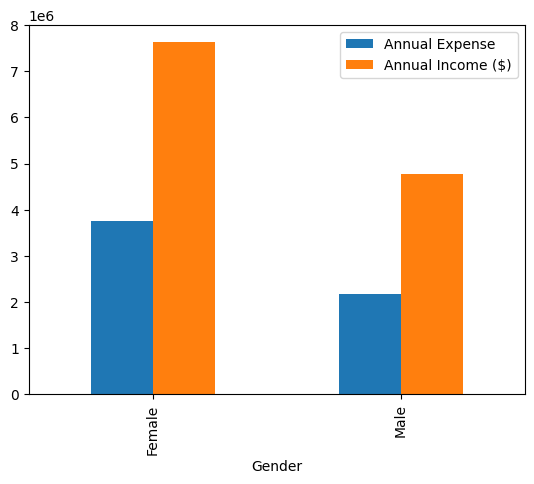

In [ ]:
chart.plot(kind = 'bar')

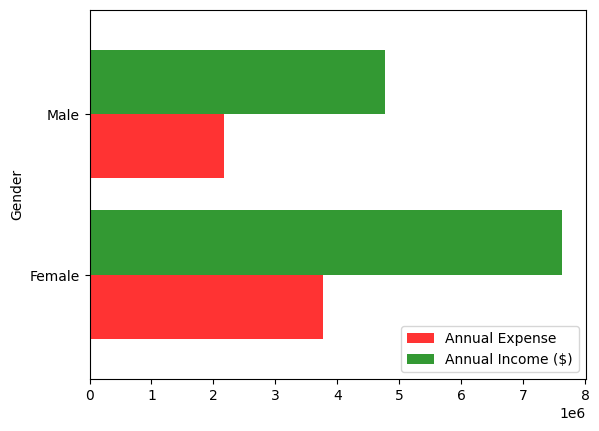

In [ ]:
coloresMedallas = ['#FF0000','#008000']
chart.plot(kind = 'barh', width=0.8, alpha=0.8,color = coloresMedallas).legend(loc="lower right")

**4. Añade algún análisis que creas que puede ser interesante explicando por pantalla el resultado del mismo.**

Definiremos una función que nos ayude a calcular el rango de experiencia de los profesionales

In [ ]:
def ExperienceRange(workexp):
    match workexp:
        case _ if workexp == 0:
            return '1. Sin Experiencia'
        case _ if 1 <= workexp < 3:
            return '2. De 1 a 3'
        case _ if 3 <= workexp < 5:
            return '3. De 3 a 5'
        case _ if 5 <= workexp < 8:
            return '4. De 5 a 8'
        case _ if 8 <= workexp < 12:
            return '5. De 8 a 12'
        case _ if 12 <= workexp < 15:
            return '6. De 12 a 15'
        case _ if workexp >= 15:
            return '7. Mas de 15'

Creamos el campo Rango de experiencia de trabajo para hacer un analisis con dicha variable

In [ ]:
df_clear["Range Work Experience"] = df_clear["Work Experience"].apply(ExperienceRange)

<ipython-input-52-a86ea81b6735>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clear["Range Work Experience"] = df_clear["Work Experience"].apply(ExperienceRange)


Generamos una tabla pivoteada de las profesiones, el rango de experiencia y los valores sumarizados de los ingresos anuales

In [ ]:
WExp_Prof_Inc=pd.pivot_table(df_clear, values=["Annual Income ($)"], index="Range Work Experience",
                       columns="Profession", aggfunc="sum",sort=True)

Generamos una tabla pivoteada de las profesiones, el rango de experiencia y los valores sumarizados de los egresos anuales

In [ ]:
WExp_Prof_Exp=pd.pivot_table(df_clear, values=["Annual Expense"], index="Range Work Experience",
                       columns="Profession", aggfunc="sum",sort=True)

In [ ]:
WExp_Prof_Inc

Annual Income ($)                                      \
Profession                       Artist     Doctor   Engineer Entertainment   
Range Work Experience                                                         
1. Sin Experiencia           10832858.0  2445618.0  4039812.0     5678048.0   
2. De 1 a 3                  12737949.0  4481909.0  4240184.0     6613462.0   
3. De 3 a 5                   5876494.0   826857.0  1270526.0     1585242.0   
4. De 5 a 8                  10774311.0  2273526.0  3179698.0     3105039.0   
5. De 8 a 12                  8928054.0  2603162.0  3985366.0     3587090.0   
6. De 12 a 15                 1298201.0   728041.0   173394.0      177260.0   
7. Mas de 15                   515283.0   160355.0   198281.0       97879.0   

                                                                              \
Profession             Executive Healthcare  Homemaker     Lawyer  Marketing   
Range Work Experience                                                          
1. Sin Experiencia     3246053.0  7549467.0   294164.0  3116956.0  1320697.0   
2. De 1 a 3            2443263.0  7613211.0   798802.0  3965470.0  2064349.0   
3. De 3 a 5            1622539.0  2998836.0   327700.0  1211438.0   343243.0   
4. De 5 a 8            3072543.0  4365785.0   658118.0  1875254.0  1028253.0   
5. De 8 a 12           3354749.0  6069778.0  2454048.0  1890427.0  1604481.0   
6. De 12 a 15           285192.0   232538.0   301691.0   184736.0   334108.0   
7. Mas de 15             66852.0   276093.0        NaN   156486.0        NaN   

                                  
Profession               Unknown  
Range Work Experience             
1. Sin Experiencia      469719.0  
2. De 1 a 3             648403.0  
3. De 3 a 5             130706.0  
4. De 5 a 8            1109843.0  
5. De 8 a 12            595981.0  
6. De 12 a 15           121725.0  
7. Mas de 15                 NaN

In [ ]:
WExp_Prof_Exp

Annual Expense                                        \
Profession                    Artist      Doctor    Engineer Entertainment   
Range Work Experience                                                        
1. Sin Experiencia        5541385.40  1193355.98  1873133.89    3200177.36   
2. De 1 a 3               6497121.43  2055905.48  2234780.18    3346813.46   
3. De 3 a 5               2978032.85   410809.44   787312.40     970004.97   
4. De 5 a 8               6158580.30  1245711.68  1628808.23    1490874.14   
5. De 8 a 12              4767596.86  1337266.39  2029012.64    1943762.74   
6. De 12 a 15              652769.20   459344.07     6935.76      79767.00   
7. Mas de 15               241798.59    99435.03    56638.79      39151.60   

                                                                       \
Profession              Executive  Healthcare   Homemaker      Lawyer   
Range Work Experience                                                   
1. Sin Experiencia     1701293.65  3579879.10    91707.82  1439898.51   
2. De 1 a 3            1286930.01  4232275.19   411521.13  1673851.22   
3. De 3 a 5             988592.42  1683276.46    92799.88   623285.14   
4. De 5 a 8            1426856.17  2026429.75   325046.30   995894.97   
5. De 8 a 12           1326217.48  2916523.52  1107483.41  1051211.42   
6. De 12 a 15           197414.76    43744.34   180319.14    96062.72   
7. Mas de 15             48801.96   220875.43         NaN    56116.92   

                                              
Profession              Marketing    Unknown  
Range Work Experience                         
1. Sin Experiencia      717972.61  253426.10  
2. De 1 a 3            1100411.00  275358.48  
3. De 3 a 5             109415.20   94108.32  
4. De 5 a 8             382682.21  440495.75  
5. De 8 a 12            799788.10  197723.14  
6. De 12 a 15            80078.82    3651.75  
7. Mas de 15                  NaN        NaN

Text(0, 0.5, 'Annual Income')

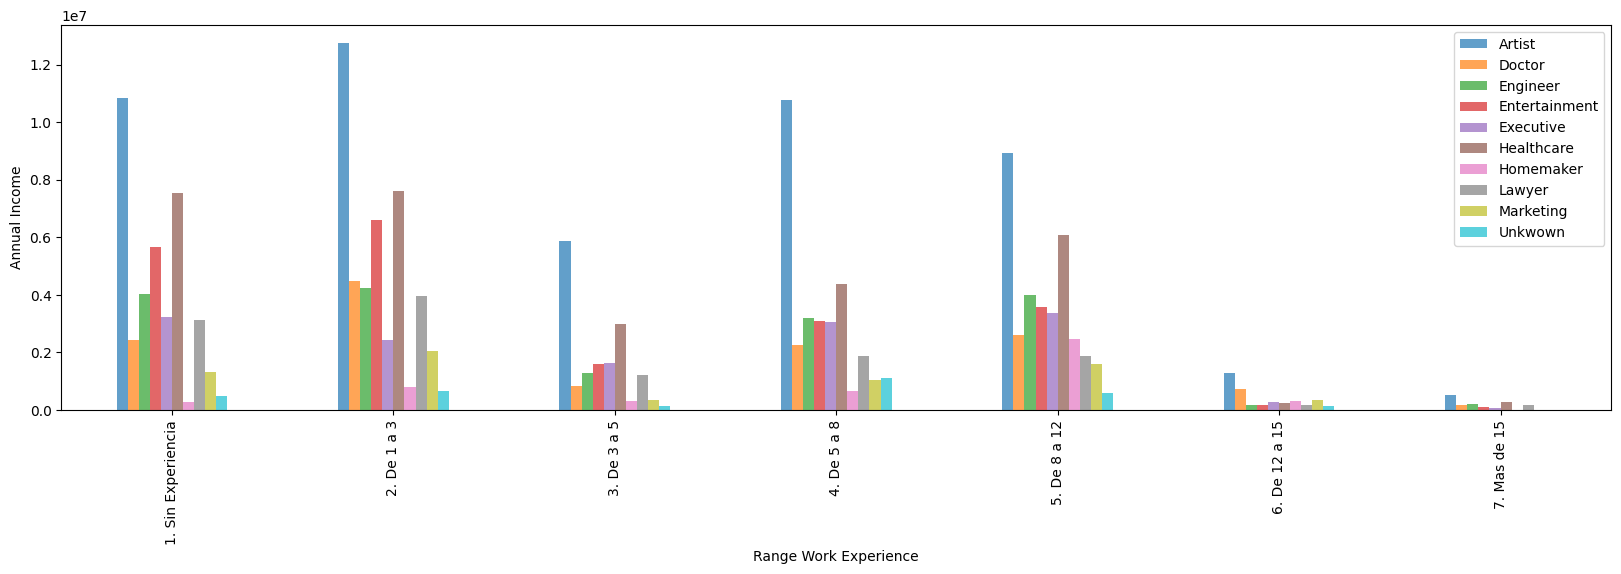

In [ ]:
WExp_Prof_Inc.plot(kind = 'bar', alpha=0.7)
plt.legend(["Artist", "Doctor", "Engineer", "Entertainment", "Executive", "Healthcare", "Homemaker", "Lawyer", "Marketing", "Unkwown"], loc ="upper right")
plt.rcParams["figure.figsize"] = (20,5)
plt.xlabel("Range Work Experience")
plt.ylabel("Annual Income")

Text(0, 0.5, 'Expenses Income')

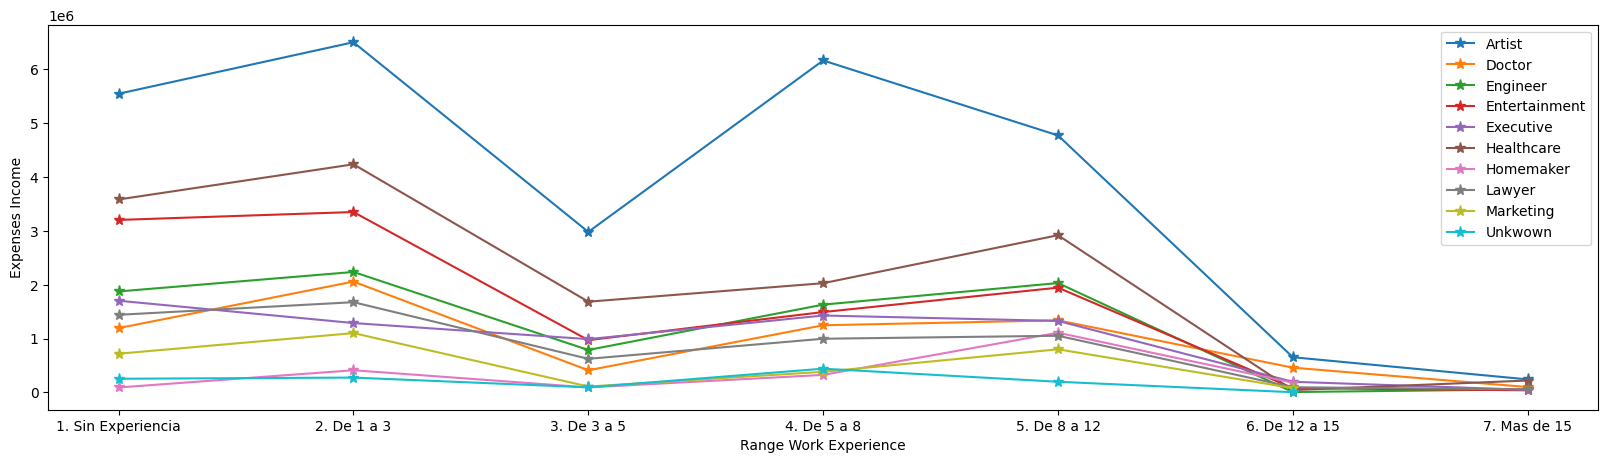

In [ ]:
plt.plot(WExp_Prof_Exp, marker ='*',markersize=8)
plt.legend(["Artist", "Doctor", "Engineer", "Entertainment", "Executive", "Healthcare", "Homemaker", "Lawyer", "Marketing", "Unkwown"], loc ="upper right")
plt.rcParams["figure.figsize"] = (20,5)
plt.xlabel("Range Work Experience")
plt.ylabel("Expenses Income")

En base a lo analizado respecto a los ingresos, la profesion y los años de experiencia observamos lo siguiente:


1.   Los artistas son los profesionales que poseen mayores ingresos anuales respecto a las demas profesiones, seguido por los profesionales de cuidado de salud
2.   Se evidencia que a más experiencia que se va adquiriendo por parte de los profesionales los ingresos por parte de su desempeño de la profesión van disminuyendo



En base a lo analizado respecto a los egresos, la profesion y los años de experiencia observamos lo siguiente:


1.   Los artistas son los profesionales que poseen mayores egresos anuales respecto a las demas profesiones, seguido por los profesionales de cuidado de salud
2.   Se evidencia que a más experiencia que se va adquiriendo por parte de los profesionales los egresos van disminuyendo teniendo un comportamiento similar a los ingresos

In [ ]:
En conclusión podemos determinar lo siguiente:
- Los Artistas profesionales asi como poseen una mayor cantidad de ingresos tambien poseen las mayores cantidades de egresos respecto a los demas profesionales
- Para todos los profesionales asi como sus ingresos van disminuyendo a lo largo de la experiencia que adquieren sus egresos tambien disminuyen
- Durante los primeros 5 años de experiencia dentro del 1 al 3 año de experiencia se logra obtener una mayor cantidad de ingresos pero estos tambien poseen un incremento en la cantidad de egresos
- Se esperaria que en base a mayor cantidad de experiencia obtenida por los profesionales sus ingresos sean mayores, pero podemos plantear como hipotesis que estos dejan de dedicarse a su profesión y optan por realizar inversiones
que les generen ingresos fuera de su profesión para tener un respaldo adicional a futuro
- Cuando se tiene una experiencia mayor de 15 años asi como se obtiene menores ingresos por el desempeño de la carrera se tiene menos egresos posiblemente porque se busca lo necesario para solventar gastos vitales y obtener mayor tiempo
para compartir con la familia o valorar algunas otras actividades.